In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

df = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@movie_data.csv", index_col=0)

df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast
0,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...",...,2787965087,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"Sam Worthington, Zoe Saldana, Sigourney Weaver..."
1,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",...,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"Johnny Depp, Orlando Bloom, Keira Knightley, S..."
2,245000000,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24",...,880674609,148.0,"Français, English, Español, Italiano, Deutsch",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra..."
3,250000000,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",...,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"Christian Bale, Michael Caine, Gary Oldman, An..."
4,260000000,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,...,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"Taylor Kitsch, Lynn Collins, Samantha Morton, ..."


In [2]:
df.loc[df["revenue"]>df["budget"],"profitable"]=1
df.loc[df["revenue"]<=df["budget"],"profitable"]=0
#Or
#df['profitable'] = df.revenue > df.budget
#df['profitable'] = df['profitable'].astype(int)
regression_target='revenue'
classification_target='profitable'

In [3]:
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,profitable
0,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...",...,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",1.0


In [4]:
df['profitable'].value_counts()

1.0    2585
0.0    2218
Name: profitable, dtype: int64

In [5]:
df.replace((np.inf or -np.inf), np.nan, inplace=True) 
df.dropna(inplace=True)
#or
#df = df.replace([np.inf, -np.inf], np.nan)
#df = df.dropna(how="any")

In [6]:
df.dropna()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,profitable
0,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...",...,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",1.0
1,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",...,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"Johnny Depp, Orlando Bloom, Keira Knightley, S...",1.0
2,245000000,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24",...,148.0,"Français, English, Español, Italiano, Deutsch",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",1.0
3,250000000,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",...,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"Christian Bale, Michael Caine, Gary Oldman, An...",1.0
4,260000000,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,...,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758,4000000,"Thriller, Science Fiction",https://www.facebook.com/thesignalfilm,242095,"hacker, supernatural powers, road trip, indepe...",en,The Signal,Three college students on a road trip across t...,27.662696,"Automatik Entertainment, Low Spark Films, Sign...",...,95.0,English,Released,R U Agitated?,The Signal,5.8,631,242095,"Brenton Thwaites, Olivia Cooke, Beau Knapp, La...",0.0
4766,0,"Documentary, Music",http://www.mgm.com/#/our-titles/1092/The-Last-...,13963,"1970s, music",en,The Last Waltz,Martin Scorsese's rockumentary intertwines foo...,3.277287,"FM Productions, Last Waltz Inc.",...,117.0,English,Released,It Started as a Concert. It Became a Celebration.,The Last Waltz,7.9,64,13963,"Robbie Robertson, Rick Danko, Levon Helm, Rich...",1.0
4773,27000,Comedy,http://www.miramax.com/movie/clerks/,2292,"salesclerk, loser, aftercreditsstinger",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,"Miramax Films, View Askew Productions",...,92.0,English,Released,Just because they serve you doesn't mean they ...,Clerks,7.4,755,2292,"Brian O'Halloran, Jeff Anderson, Jason Mewes, ...",1.0
4791,13,Horror,http://tincanmanthemovie.com/,157185,home invasion,en,Tin Can Man,Recently dumped by his girlfirend for another ...,0.332679,"Park Films, Camera Stylo Films",...,84.0,English,Released,Everything You've Heard is True,Tin Can Man,2.0,1,157185,"Michael Parle, Emma Eliza Regan, Patrick O'Don...",0.0


In [7]:
df.count()

budget                  1406
genres                  1406
homepage                1406
id                      1406
keywords                1406
original_language       1406
original_title          1406
overview                1406
popularity              1406
production_companies    1406
production_countries    1406
release_date            1406
revenue                 1406
runtime                 1406
spoken_languages        1406
status                  1406
tagline                 1406
title                   1406
vote_average            1406
vote_count              1406
movie_id                1406
cast                    1406
profitable              1406
dtype: int64

In [8]:
df.shape

(1406, 23)

In [9]:
g=df['genres']

In [10]:
g.iloc[0].split(",")

['Action', ' Adventure', ' Fantasy', ' Science Fiction']

In [11]:
l=list()
p=set()
for k in range(len(g)):
    l=g.iloc[k].replace(",","").replace("Science Fiction", "ScienceFiction").split(" ")
    for i in range(len(l)):
        p.add(l[i])

In [12]:
p

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Movie',
 'Music',
 'Mystery',
 'Romance',
 'ScienceFiction',
 'TV',
 'Thriller',
 'War',
 'Western'}

In [13]:
p=list(p)
p.remove('ScienceFiction')
p.append('Science Fiction')
p

['Action',
 'Western',
 'Family',
 'Fantasy',
 'Mystery',
 'Romance',
 'Documentary',
 'Drama',
 'Music',
 'Crime',
 'War',
 'Movie',
 'Comedy',
 'History',
 'Adventure',
 'Animation',
 'Foreign',
 'TV',
 'Thriller',
 'Horror',
 'Science Fiction']

In [14]:

for genre in p:
    df[genre] = df['genres'].str.contains(genre).astype(int)

In [15]:
df[p].head()

,Action,Western,Family,Fantasy,Mystery,Romance,Documentary,Drama,Music,Crime,...,Movie,Comedy,History,Adventure,Animation,Foreign,TV,Thriller,Horror,Science Fiction
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [16]:
list_genres = df.genres.apply(lambda x: x.split(","))
genres = []
for row in list_genres:
    row = [genre.strip() for genre in row]
    for genre in row:
        if genre not in genres:
            genres.append(genre) #just understand your work till here and below is important component.

for genre in genres:
    df[genre] = df['genres'].str.contains(genre).astype(int)

In [17]:
len(genres)

20

In [18]:
df[genres].head()

,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,War,History,Music,Documentary,TV Movie,Foreign
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


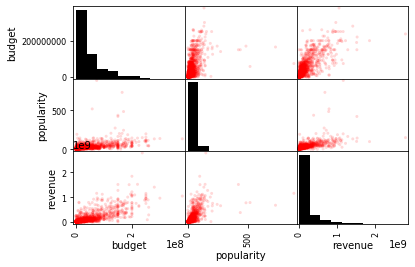

budget          1.754872
popularity      7.968139
runtime         1.059804
vote_count      2.461041
vote_average   -1.080038
revenue         3.084680
profitable     -1.081030
dtype: float64

In [19]:
continuous_covariates = ['budget', 'popularity', 'runtime', 'vote_count', 'vote_average']
outcomes_and_continuous_covariates = continuous_covariates + [regression_target, classification_target]
plotting_variables = ['budget', 'popularity', regression_target]

axes = pd.plotting.scatter_matrix(df[plotting_variables], alpha=0.15, \
       color=(0,0,0), hist_kwds={"color":(0,0,0)}, facecolor=(1,0,0))

plt.show()

df[outcomes_and_continuous_covariates].skew()

In [20]:
for X in df[outcomes_and_continuous_covariates]:
    df[X]=np.log10(1+df[X])
#for covariate in ['budget', 'popularity', 'runtime', 'vote_count', 'revenue']:
#df[covariate] = df[covariate].apply(lambda x: np.log10(1+x))

In [21]:
df[outcomes_and_continuous_covariates].skew()

budget         -2.816990
popularity     -0.431543
runtime         0.530489
vote_count     -0.677632
vote_average   -5.085715
revenue        -2.177372
profitable     -1.081030
dtype: float64

In [22]:
df.to_csv('movies_clean.csv') #Save dataframe object to csv for later use

In [61]:
# DO NOT EDIT THIS CODE
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# EDIT THIS CODE TO LOAD THE SAVED DF FROM THE LAST HOMEWORK
df = pd.read_csv('movies_clean.csv')

In [62]:
#We will use these methods to predict revenue, and we will use logistic regression to classify whether a movie was profitable.

In [63]:
# Define all covariates and outcomes from `df`.
regression_target = 'revenue'
classification_target = 'profitable'
all_covariates = ['budget', 'popularity', 'runtime', 'vote_count', 'vote_average', 'Action', 'Adventure', 'Fantasy', 
                  'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 
                  'Horror', 'Mystery', 'War', 'History', 'Music', 'Documentary', 'TV Movie', 'Foreign']

regression_outcome = df[regression_target]
classification_outcome = df[classification_target]
covariates = df[all_covariates]

# Instantiate all regression models and classifiers.
linear_regression = LinearRegression()
logistic_regression = LogisticRegression()
forest_regression = RandomForestRegressor(max_depth=4, random_state=0)
forest_classifier = RandomForestClassifier(max_depth=4, random_state=0)

In [64]:
def correlation(estimator, X, y):
    predictions = estimator.fit(X,y).predict(X)
    return r2_score(y, predictions)
    #if just wanted score, could do: estimator.score(X,y)

def accuracy(estimator, X, y):
    predictions = estimator.fit(X,y).predict(X)
    return accuracy_score(y, predictions)

In [65]:
covariates

,budget,popularity,runtime,vote_count,vote_average,Action,Adventure,Fantasy,Science Fiction,Crime,...,Comedy,Romance,Horror,Mystery,War,History,Music,Documentary,TV Movie,Foreign
0,8.374748,2.180234,2.212188,4.071919,0.913814,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,8.477121,2.146384,2.230449,3.653309,0.897627,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.389166,2.034936,2.173186,3.650016,0.863323,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,8.397940,2.054280,2.220108,3.959375,0.934498,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,8.414973,1.652507,2.123852,3.327359,0.851258,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,6.602060,1.457317,1.982271,2.800717,0.832509,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1402,0.000000,0.631168,2.071882,1.812913,0.949390,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1403,4.431380,1.316990,1.968483,2.878522,0.924279,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1404,1.146128,0.124726,1.929419,0.301030,0.477121,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


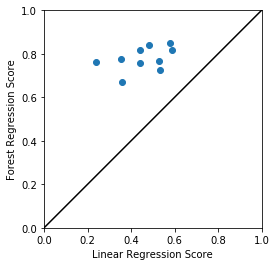

In [66]:
# Determine the cross-validated correlation for linear and random forest models.
linear_regression_scores=cross_val_score(linear_regression, covariates, regression_outcome, cv=10, scoring=correlation)
forest_regression_scores= cross_val_score(forest_regression, covariates, regression_outcome, cv=10, scoring=correlation)

# Plot Results
plt.axes().set_aspect('equal', 'box')
plt.scatter(linear_regression_scores, forest_regression_scores)
plt.plot((0, 1), (0, 1), 'k-')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Linear Regression Score")
plt.ylabel("Forest Regression Score")

# Show the plot.
plt.show()
#Shows that the score is much higher in forest regression so model performs better when taking in covariates (all the variables)
#in budget, popularity, etc. and outcome of regression which is the revenue of movie. So, checked whether score was g which
#is decided by predicitons through linear (created by model fit()) and the actual y (revenue). Same for forests.

In [67]:
regression_outcome

0       9.445287
1       8.982723
2       8.944815
3       9.035405
4       8.453531
          ...   
1401    5.778800
1402    5.507792
1403    6.498466
1404    0.000000
1405    5.628145
Name: revenue, Length: 1406, dtype: float64

In [68]:
covariates

,budget,popularity,runtime,vote_count,vote_average,Action,Adventure,Fantasy,Science Fiction,Crime,...,Comedy,Romance,Horror,Mystery,War,History,Music,Documentary,TV Movie,Foreign
0,8.374748,2.180234,2.212188,4.071919,0.913814,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,8.477121,2.146384,2.230449,3.653309,0.897627,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.389166,2.034936,2.173186,3.650016,0.863323,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,8.397940,2.054280,2.220108,3.959375,0.934498,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,8.414973,1.652507,2.123852,3.327359,0.851258,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,6.602060,1.457317,1.982271,2.800717,0.832509,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1402,0.000000,0.631168,2.071882,1.812913,0.949390,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1403,4.431380,1.316990,1.968483,2.878522,0.924279,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1404,1.146128,0.124726,1.929419,0.301030,0.477121,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [71]:
df[classification_target][df[classification_target]>0]=1

In [72]:
df[classification_target]

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1401    0.0
1402    1.0
1403    1.0
1404    0.0
1405    1.0
Name: profitable, Length: 1406, dtype: float64

In [73]:
classification_outcome=df[classification_target]

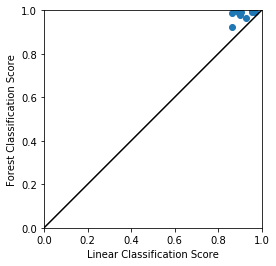

In [74]:
# Determine the cross-validated accuracy for logistic and random forest models.
classification_outcome=df[classification_target]
logistic_regression_scores = cross_val_score(logistic_regression, covariates, classification_outcome, cv=10, scoring=accuracy)
forest_classification_scores = cross_val_score(forest_classifier, covariates, classification_outcome, cv=10, scoring=accuracy)

# Plot Results
plt.axes().set_aspect('equal', 'box')
plt.scatter(logistic_regression_scores, forest_classification_scores)
plt.plot((0, 1), (0, 1), 'k-')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Linear Classification Score")
plt.ylabel("Forest Classification Score")

# Show the plot.
plt.show()

In [75]:
#regression_outcome = positive_revenue_df[regression_target]
#classification_outcome = positive_revenue_df[classification_target]

In [76]:
df

,Unnamed: 0,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,Comedy,History,Adventure,Animation,Foreign,TV,Thriller,Horror,Science Fiction,TV Movie
0,0,8.374748,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",2.180234,...,0,0,1,0,0,0,0,0,1,0
1,1,8.477121,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",2.146384,...,0,0,1,0,0,0,0,0,0,0
2,2,8.389166,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,2.034936,...,0,0,1,0,0,0,0,0,0,0
3,3,8.397940,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,2.054280,...,0,0,0,0,0,0,1,0,0,0
4,4,8.414973,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",1.652507,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,4758,6.602060,"Thriller, Science Fiction",https://www.facebook.com/thesignalfilm,242095,"hacker, supernatural powers, road trip, indepe...",en,The Signal,Three college students on a road trip across t...,1.457317,...,0,0,0,0,0,0,1,0,1,0
1402,4766,0.000000,"Documentary, Music",http://www.mgm.com/#/our-titles/1092/The-Last-...,13963,"1970s, music",en,The Last Waltz,Martin Scorsese's rockumentary intertwines foo...,0.631168,...,0,0,0,0,0,0,0,0,0,0
1403,4773,4.431380,Comedy,http://www.miramax.com/movie/clerks/,2292,"salesclerk, loser, aftercreditsstinger",en,Clerks,Convenience and video store clerks Dante and R...,1.316990,...,1,0,0,0,0,0,0,0,0,0
1404,4791,1.146128,Horror,http://tincanmanthemovie.com/,157185,home invasion,en,Tin Can Man,Recently dumped by his girlfirend for another ...,0.124726,...,0,0,0,0,0,0,0,1,0,0


In [77]:
positive_revenue_df = df[df['revenue']>0]
positive_revenue_df

,Unnamed: 0,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,Comedy,History,Adventure,Animation,Foreign,TV,Thriller,Horror,Science Fiction,TV Movie
0,0,8.374748,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",2.180234,...,0,0,1,0,0,0,0,0,1,0
1,1,8.477121,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",2.146384,...,0,0,1,0,0,0,0,0,0,0
2,2,8.389166,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,2.034936,...,0,0,1,0,0,0,0,0,0,0
3,3,8.397940,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,2.054280,...,0,0,0,0,0,0,1,0,0,0
4,4,8.414973,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",1.652507,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,4752,4.812920,"Romance, Comedy, Drama",http://tinyfurniture.com/,47607,"sister sister relationship, male female relati...",en,Tiny Furniture,"After graduating from film school, Aura return...",0.528959,...,1,0,0,0,0,0,0,0,0,0
1401,4758,6.602060,"Thriller, Science Fiction",https://www.facebook.com/thesignalfilm,242095,"hacker, supernatural powers, road trip, indepe...",en,The Signal,Three college students on a road trip across t...,1.457317,...,0,0,0,0,0,0,1,0,1,0
1402,4766,0.000000,"Documentary, Music",http://www.mgm.com/#/our-titles/1092/The-Last-...,13963,"1970s, music",en,The Last Waltz,Martin Scorsese's rockumentary intertwines foo...,0.631168,...,0,0,0,0,0,0,0,0,0,0
1403,4773,4.431380,Comedy,http://www.miramax.com/movie/clerks/,2292,"salesclerk, loser, aftercreditsstinger",en,Clerks,Convenience and video store clerks Dante and R...,1.316990,...,1,0,0,0,0,0,0,0,0,0


In [78]:
positive_revenue_df = df[df['revenue']>0]

# Replace the dataframe in the following code, and run.
regression_outcome = positive_revenue_df[regression_target]
classification_outcome = positive_revenue_df[classification_target]
covariates = positive_revenue_df[all_covariates]

# Reinstantiate all regression models and classifiers.
linear_regression = LinearRegression()
logistic_regression = LogisticRegression()
forest_regression = RandomForestRegressor(max_depth=4, random_state=0)
forest_classifier = RandomForestClassifier(max_depth=4, random_state=0)
linear_regression_scores = cross_val_score(linear_regression, covariates, regression_outcome, cv=10, scoring=correlation)
forest_regression_scores = cross_val_score(forest_regression, covariates, regression_outcome, cv=10, scoring=correlation)
logistic_regression_scores = cross_val_score(logistic_regression, covariates, classification_outcome, cv=10, scoring=accuracy)
forest_classification_scores = cross_val_score(forest_classifier, covariates, classification_outcome, cv=10, scoring=accuracy)

In [79]:
np.mean(forest_regression_scores)

0.7680610407227343

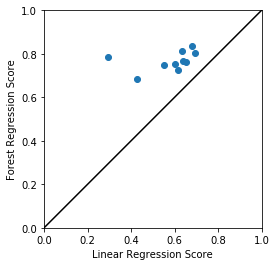

[('Fantasy', 0.0),
 ('Music', 0.0),
 ('TV Movie', 0.0),
 ('Foreign', 0.0),
 ('Documentary', 5.0242102884089965e-05),
 ('Romance', 6.604583330721586e-05),
 ('Western', 0.00015626864826347376),
 ('Thriller', 0.00015821728190237307),
 ('Mystery', 0.00018214788588276072),
 ('Horror', 0.00020010584158045155),
 ('War', 0.00021568794173586987),
 ('Action', 0.00039731194014744624),
 ('History', 0.0004223908705396497),
 ('Family', 0.0004586994511166151),
 ('Comedy', 0.0005068269265224419),
 ('Animation', 0.0009318004228486637),
 ('Science Fiction', 0.0009980285384426231),
 ('Crime', 0.0010130985717443698),
 ('Drama', 0.0013281289930065158),
 ('Adventure', 0.003080303040107078),
 ('vote_average', 0.006646714634639984),
 ('runtime', 0.016135965006071725),
 ('popularity', 0.08355296569387499),
 ('budget', 0.30757299732366344),
 ('vote_count', 0.5759260530517182)]

In [80]:
# Determine the cross-validated correlation for linear and random forest models.
linear_regression_scores=cross_val_score(linear_regression, covariates, regression_outcome, cv=10, scoring=correlation)
forest_regression_scores= cross_val_score(forest_regression, covariates, regression_outcome, cv=10, scoring=correlation)

# Plot Results
plt.axes().set_aspect('equal', 'box')
plt.scatter(linear_regression_scores, forest_regression_scores)
plt.plot((0, 1), (0, 1), 'k-')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Linear Regression Score")
plt.ylabel("Forest Regression Score")

# Show the plot.
plt.show()

# Print the importance of each covariate in the random forest regression.
forest_regression.fit(positive_revenue_df[all_covariates], positive_revenue_df[regression_target])
sorted(list(zip(all_covariates, forest_regression.feature_importances_)), key=lambda tup: tup[1])
#Code is provided for you that prints the importance of each covariate in predicting revenue using the random forest regressor. 
#Consider which variables are the most important.

In [82]:
positive_revenue_df[classification_target]

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1400    1.0
1401    0.0
1402    1.0
1403    1.0
1405    1.0
Name: profitable, Length: 1260, dtype: float64

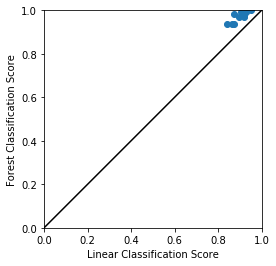

[('TV Movie', 0.0),
 ('Horror', 0.001715202327676785),
 ('Animation', 0.0019388197444951466),
 ('Comedy', 0.0022574689899296065),
 ('Foreign', 0.0022801352325337114),
 ('Documentary', 0.002846458591904433),
 ('Romance', 0.0031608732977368944),
 ('Thriller', 0.0035569898966812397),
 ('Mystery', 0.004282452349394276),
 ('Music', 0.004308655018573079),
 ('Fantasy', 0.0051937079152913745),
 ('Western', 0.005480591973153852),
 ('Family', 0.0066609392542522055),
 ('Crime', 0.006772395781754328),
 ('History', 0.006793172805113654),
 ('Action', 0.0073412694021133835),
 ('Adventure', 0.007596959755592538),
 ('Science Fiction', 0.010816587516514861),
 ('War', 0.011275947022575308),
 ('Drama', 0.023093574562804687),
 ('runtime', 0.04154729351420867),
 ('budget', 0.08765680648089587),
 ('vote_average', 0.10261105225795153),
 ('popularity', 0.2811360280003983),
 ('vote_count', 0.36967661830845444)]

In [83]:
# Determine the cross-validated accuracy for logistic and random forest models.
classification_outcome=positive_revenue_df[classification_target]
logistic_regression_scores = cross_val_score(logistic_regression, covariates, classification_outcome, cv=10, scoring=accuracy)
forest_classification_scores = cross_val_score(forest_classifier, covariates, classification_outcome, cv=10, scoring=accuracy)

# Plot Results
plt.axes().set_aspect('equal', 'box')
plt.scatter(logistic_regression_scores, forest_classification_scores)
plt.plot((0, 1), (0, 1), 'k-')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Linear Classification Score")
plt.ylabel("Forest Classification Score")

# Show the plot.
plt.show()

# Print the importance of each covariate in the random forest classification.
forest_classifier.fit(positive_revenue_df[all_covariates], classification_outcome)
sorted(list(zip(all_covariates, forest_classifier.feature_importances_)), key=lambda tup: tup[1])

In [84]:
classification_outcome

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1400    1.0
1401    0.0
1402    1.0
1403    1.0
1405    1.0
Name: profitable, Length: 1260, dtype: float64